In [472]:
from itertools import combinations

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from scipy.stats import sem, t

In [359]:
x, y = make_blobs(n_samples=3000, n_features=6, random_state=35, shuffle=False) #22, 26
print(x.shape)

(3000, 6)


In [360]:
df = pd.DataFrame({'f0': x[:, 0], 'f1': x[:, 1], 'f2': x[:, 2], 'f3': x[:, 3], 'class': y})
print(df.head())

         f0        f1        f2        f3  class
0 -1.640910 -3.110530 -5.317272 -5.633029      0
1 -0.371466 -3.499289 -6.219917 -4.382826      0
2  0.325874 -4.173337 -5.314026 -4.225630      0
3 -2.209805 -2.850365 -5.081560 -6.048820      0
4  0.240791 -3.403846 -6.618322 -5.133645      0


In [361]:
print(f"Размерность датасета: {df.shape}")
print(f"Количество признаков: {len(df.drop("class", axis=1).columns)}")
print(f"Количество целевых классов: {df["class"].nunique()}")
print(f"Количество объектов в каждом из классов:\n{df["class"].value_counts()}")
print(f"Объектов с неопределёнными признаками: {df[df.isnull().any(axis=1)].shape[0]/df.shape[0]}%")
print(f"Другие ключевые свойства датасета:\n{df.describe()}")

Размерность датасета: (3000, 5)
Количество признаков: 4
Количество целевых классов: 3
Количество объектов в каждом из классов:
class
0    1000
1    1000
2    1000
Name: count, dtype: int64
Объектов с неопределёнными признаками: 0.0%
Другие ключевые свойства датасета:
                f0           f1           f2           f3        class
count  3000.000000  3000.000000  3000.000000  3000.000000  3000.000000
mean      3.303724    -4.680265    -1.857622     2.968885     1.000000
std       3.880306     1.266621     4.075190     5.921357     0.816633
min      -3.802469    -9.173802    -8.727526    -7.766345     0.000000
25%      -0.155965    -5.571504    -4.995869    -3.793953     0.000000
50%       2.501332    -4.668992    -3.796290     3.645093     1.000000
75%       7.536583    -3.766136     3.015962     9.093786     2.000000
max      11.497175    -0.650046     6.890159    13.236628     2.000000


In [362]:
all_feature_pairs = combinations(['f0', 'f1', 'f2', 'f3'], 2)

def print_df(data_frame, f0, f1, alpha):
    plt.scatter(data_frame[f0], data_frame[f1], c=data_frame['class'], alpha=alpha)

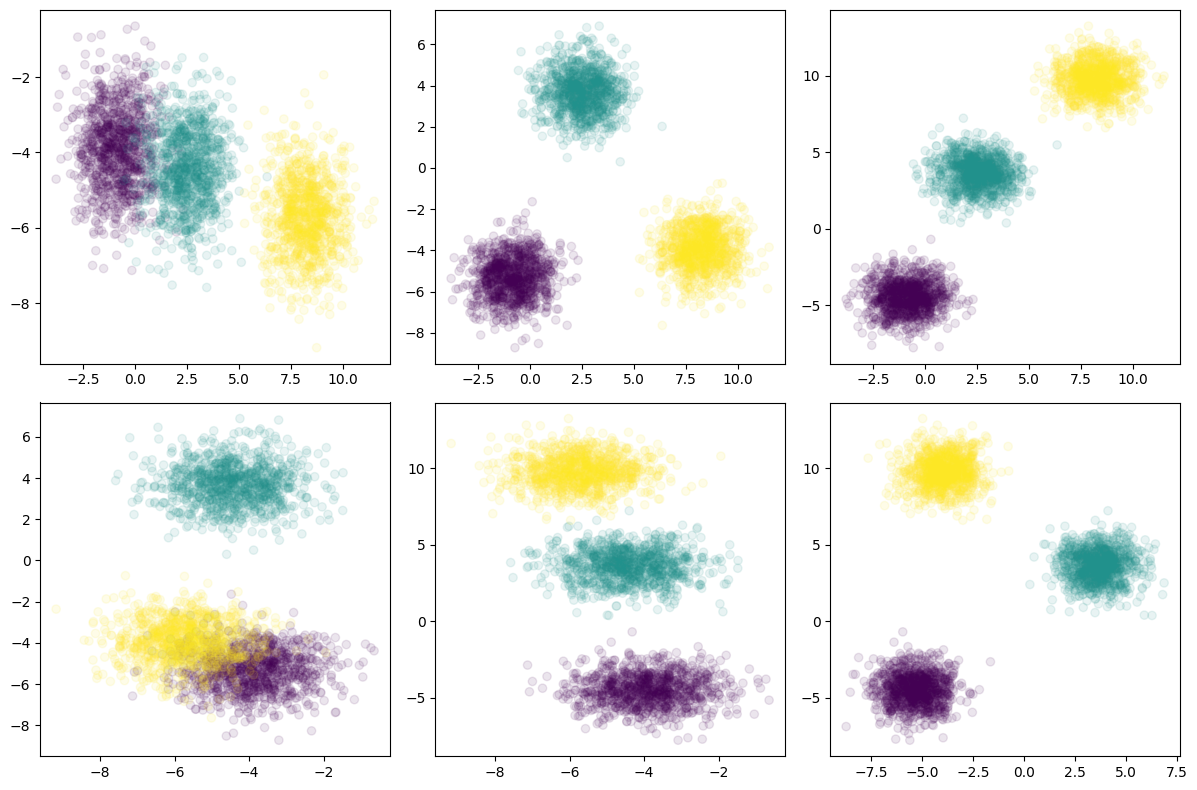

In [363]:
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.scatter(df["f0"], df["f1"], c=df["class"], alpha=0.1)
plt.subplot(232)
plt.scatter(df["f0"], df["f2"], c=df["class"], alpha=0.1)
plt.subplot(233)
plt.scatter(df["f0"], df["f3"], c=df["class"], alpha=0.1)
plt.subplot(234)
plt.scatter(df["f1"], df["f2"], c=df["class"], alpha=0.1)
plt.subplot(235)
plt.scatter(df["f1"], df["f3"], c=df["class"], alpha=0.1)
plt.subplot(236)
plt.scatter(df["f2"], df["f3"], c=df["class"], alpha=0.1)
plt.tight_layout()
plt.show()

In [364]:
df2 = pd.concat([df, df[df['class'] == 0]], ignore_index=True)
df5 = pd.concat([df] + [df[df['class'] == 0]] * 4, ignore_index=True)
df10 = pd.concat([df] + [df[df['class'] == 0]] * 9, ignore_index=True)
df20 = pd.concat([df] + [df[df['class'] == 0]] * 19, ignore_index=True)
df50 = pd.concat([df] + [df[df['class'] == 0]] * 49, ignore_index=True)
df100 = pd.concat([df] + [df[df['class'] == 0]] * 99, ignore_index=True)
df1000 = pd.concat([df] + [df[df['class'] == 0]] * 999, ignore_index=True)
df10k = pd.concat([df] + [df[df['class'] == 0]] * 9999, ignore_index=True)

In [365]:
print(df2.shape)
print(df5.shape)
print(df10.shape)
print(df20.shape)
print(df50.shape)
print(df100.shape)
print(df1000.shape)
print(df10k.shape)

(4000, 5)
(7000, 5)
(12000, 5)
(22000, 5)
(52000, 5)
(102000, 5)
(1002000, 5)
(10002000, 5)


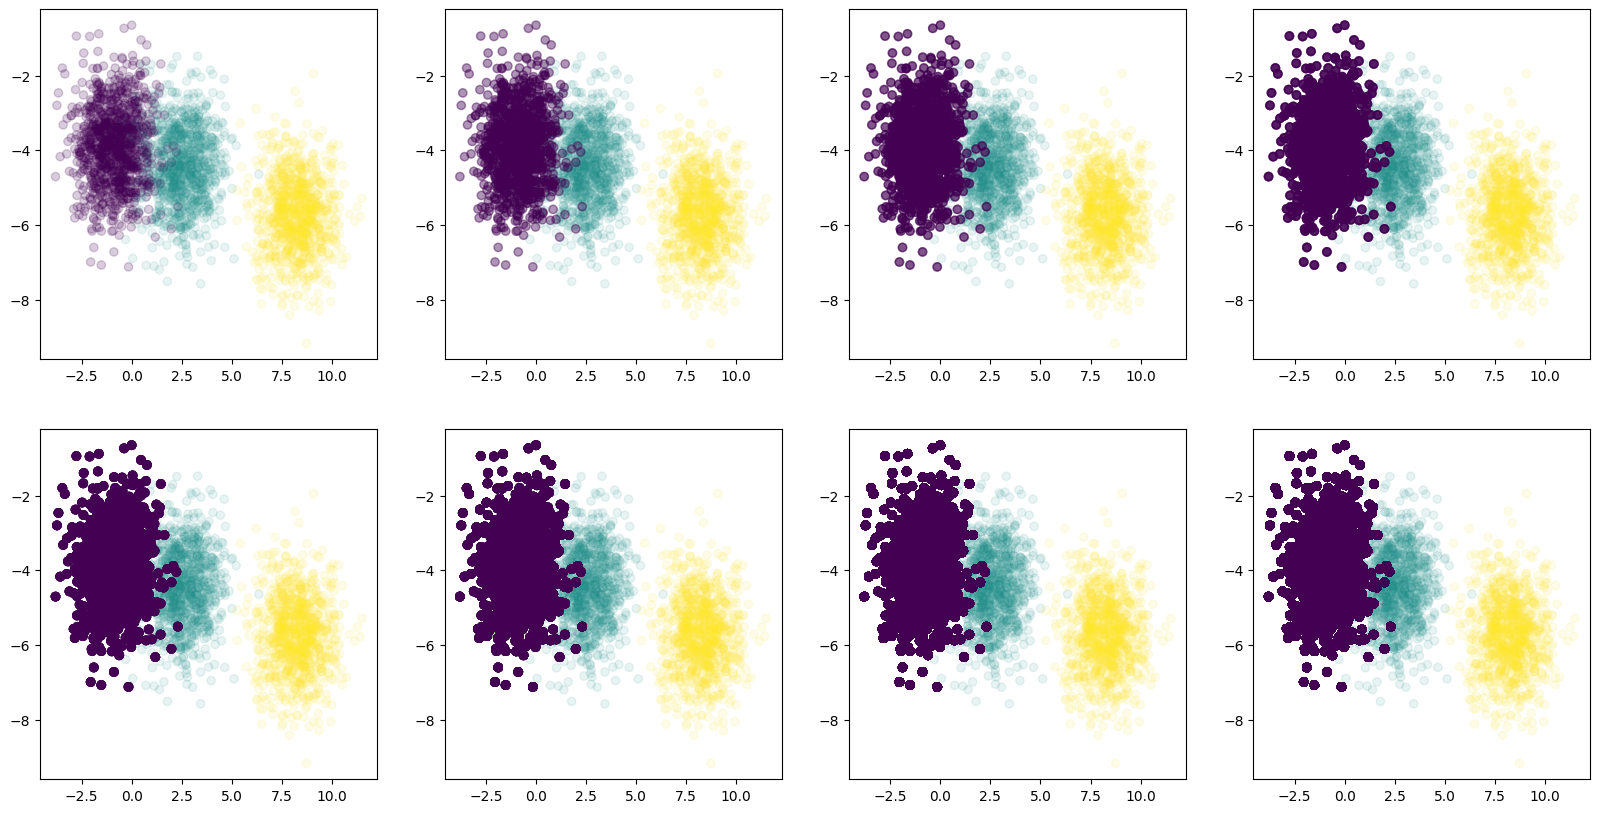

In [366]:
plt.figure(figsize=(20, 10))
plt.subplot(241)
plt.scatter(df2["f0"], df2["f1"], c=df2["class"], alpha=0.1)
plt.subplot(242)
plt.scatter(df5["f0"], df5["f1"], c=df5["class"], alpha=0.1)
plt.subplot(243)
plt.scatter(df10["f0"], df10["f1"], c=df10["class"], alpha=0.1)
plt.subplot(244)
plt.scatter(df20["f0"], df20["f1"], c=df20["class"], alpha=0.1)
plt.subplot(245)
plt.scatter(df50["f0"], df50["f1"], c=df50["class"], alpha=0.1)
plt.subplot(246)
plt.scatter(df100["f0"], df100["f1"], c=df100["class"], alpha=0.1)
plt.subplot(247)
plt.scatter(df1000["f0"], df1000["f1"], c=df1000["class"], alpha=0.1)
plt.subplot(248)
plt.scatter(df10k["f0"], df10k["f1"], c=df10k["class"], alpha=0.1)
plt.show()

In [367]:
df_reducer = lambda data_frame: data_frame[['f0', 'f1', 'class']][data_frame['class'] != 2]

In [368]:
def plot_decision_boundaries(data_frame, model, draw_key_points):
    x = data_frame[['f0', 'f1']].to_numpy()
    y = data_frame['class'].to_numpy()
    model_instance = model()
    model_instance.fit(x,y)
    x_min = x[:, 0].min() - 1
    x_max = x[:, 0].max() + 1
    y_min = x[:, 1].min() - 1
    y_max = x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    z = model_instance.predict(np.c_[xx.ravel(), yy.ravel()])
    mapped_colors = np.array(z)
    mapped_colors = mapped_colors.reshape(xx.shape)
    plt.contourf(xx, yy, mapped_colors, alpha=0.8)
    plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', marker='o', alpha=0.1)
    
    segment_centre, common_mass_centre, intersection_point = key_points(data_frame, model_instance)
    if draw_key_points:
        plt.scatter(*segment_centre, c='r', marker='x')
        plt.scatter(*common_mass_centre, c='w', marker='x')
        plt.scatter(*intersection_point, c='k', marker='x')
    return segment_centre, common_mass_centre, intersection_point

In [369]:
df_reduced = df_reducer(df)
df2_reduced = df_reducer(df2)
df5_reduced = df_reducer(df5)
df10_reduced = df_reducer(df10)
df20_reduced = df_reducer(df20)
df50_reduced = df_reducer(df50)
df100_reduced = df_reducer(df100)
df1000_reduced = df_reducer(df1000)
df10k_reduced = df_reducer(df10k)

In [370]:
def key_points(data_frame, model_instance):
    points_num = 100
    df_class0 = data_frame[data_frame['class'] == 0]
    df_class1 = data_frame[data_frame['class'] == 1]
    centre_x_0 = df_class0['f0'].mean()
    centre_y_0 = df_class0['f1'].mean()
    centre_x_1 = df_class1['f0'].mean()
    centre_y_1 = df_class1['f1'].mean()
    segment_centre = (0.5 * (centre_x_0 + centre_x_1), 0.5 * (centre_y_0 + centre_y_1))
    common_mass_centre = (data_frame['f0'].mean(), data_frame['f1'].mean())
    
    x_test = np.linspace(centre_x_0, centre_x_1, points_num)
    y_test = np.linspace(centre_y_0, centre_y_1, points_num)
    
    intersection_point = (x_test[0], y_test[0])
    for i in range(points_num - 1):
        if model_instance.predict([(x_test[i], y_test[i])]) != model_instance.predict([(x_test[i + 1], y_test[i + 1])]):
            intersection_point = (0.5 * (x_test[i] + x_test[i + 1]), 0.5 * (y_test[i] + y_test[i + 1]))
            break
            
    return segment_centre, common_mass_centre, intersection_point

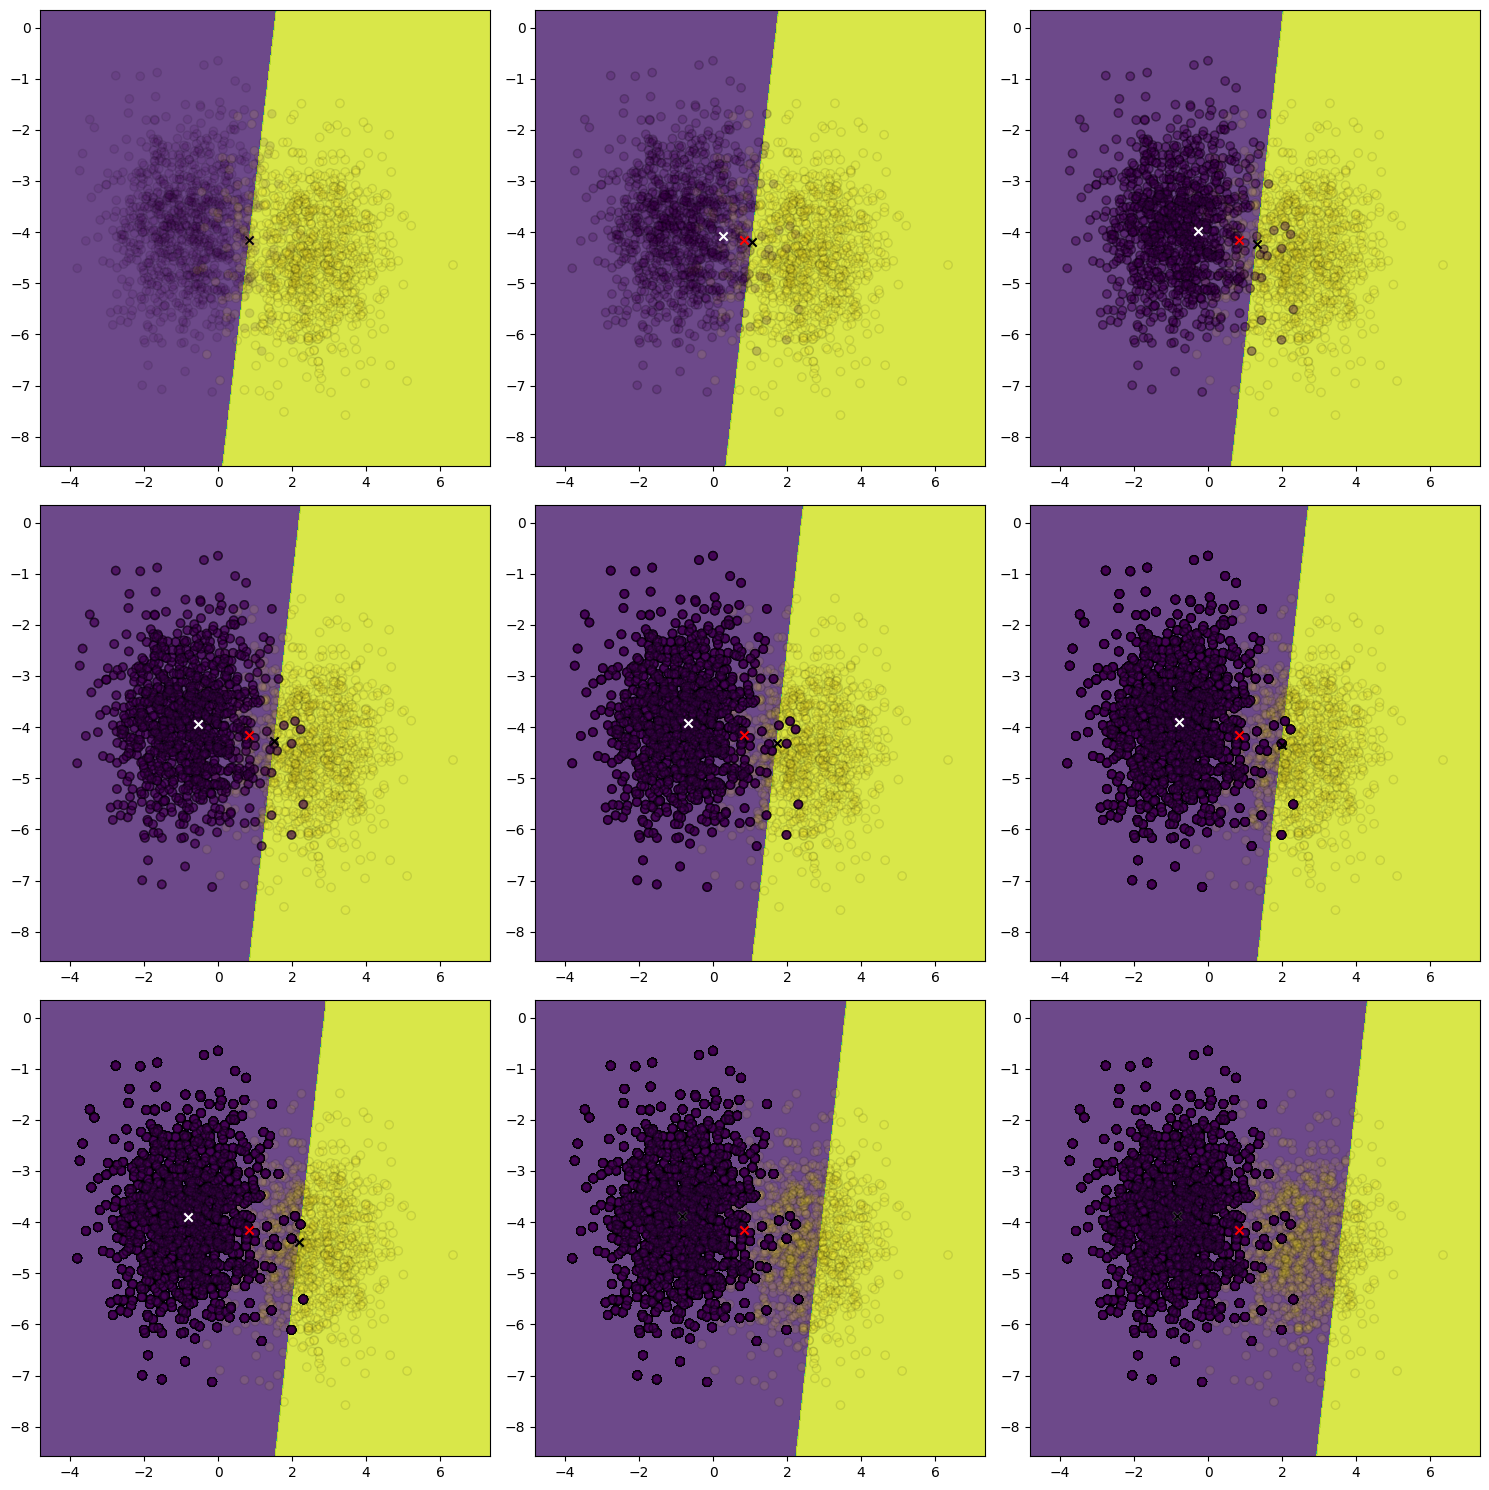

In [371]:
new_data = []

plt.figure(figsize=(15, 15))

plt.subplot(331)
segment_centre, common_mass_centre, intersection_point = plot_decision_boundaries(df_reduced, LDA, True)
new_data.append([1, segment_centre, common_mass_centre, intersection_point])

plt.subplot(332)
segment_centre, common_mass_centre, intersection_point = plot_decision_boundaries(df2_reduced, LDA, True)
new_data.append([2, segment_centre, common_mass_centre, intersection_point])

plt.subplot(333)
segment_centre, common_mass_centre, intersection_point = plot_decision_boundaries(df5_reduced, LDA, True)
new_data.append([5, segment_centre, common_mass_centre, intersection_point])

plt.subplot(334)
segment_centre, common_mass_centre, intersection_point = plot_decision_boundaries(df10_reduced, LDA, True)
new_data.append([10, segment_centre, common_mass_centre, intersection_point])

plt.subplot(335)
segment_centre, common_mass_centre, intersection_point = plot_decision_boundaries(df20_reduced, LDA, True)
new_data.append([20, segment_centre, common_mass_centre, intersection_point])

plt.subplot(336)
segment_centre, common_mass_centre, intersection_point = plot_decision_boundaries(df50_reduced, LDA, True)
new_data.append([50, segment_centre, common_mass_centre, intersection_point])

plt.subplot(337)
segment_centre, common_mass_centre, intersection_point = plot_decision_boundaries(df100_reduced, LDA, True)
new_data.append([100, segment_centre, common_mass_centre, intersection_point])

plt.subplot(338)
segment_centre, common_mass_centre, intersection_point = plot_decision_boundaries(df1000_reduced, LDA, True)
new_data.append([1000, segment_centre, common_mass_centre, intersection_point])

plt.subplot(339)
segment_centre, common_mass_centre, intersection_point = plot_decision_boundaries(df10k_reduced, LDA, True)
new_data.append([10000, segment_centre, common_mass_centre, intersection_point])

key_points_df = pd.DataFrame(new_data, columns=['repetitions', 'segment_centre', 'common_mass_centre', 'intersection_point'])

plt.tight_layout()
plt.show()

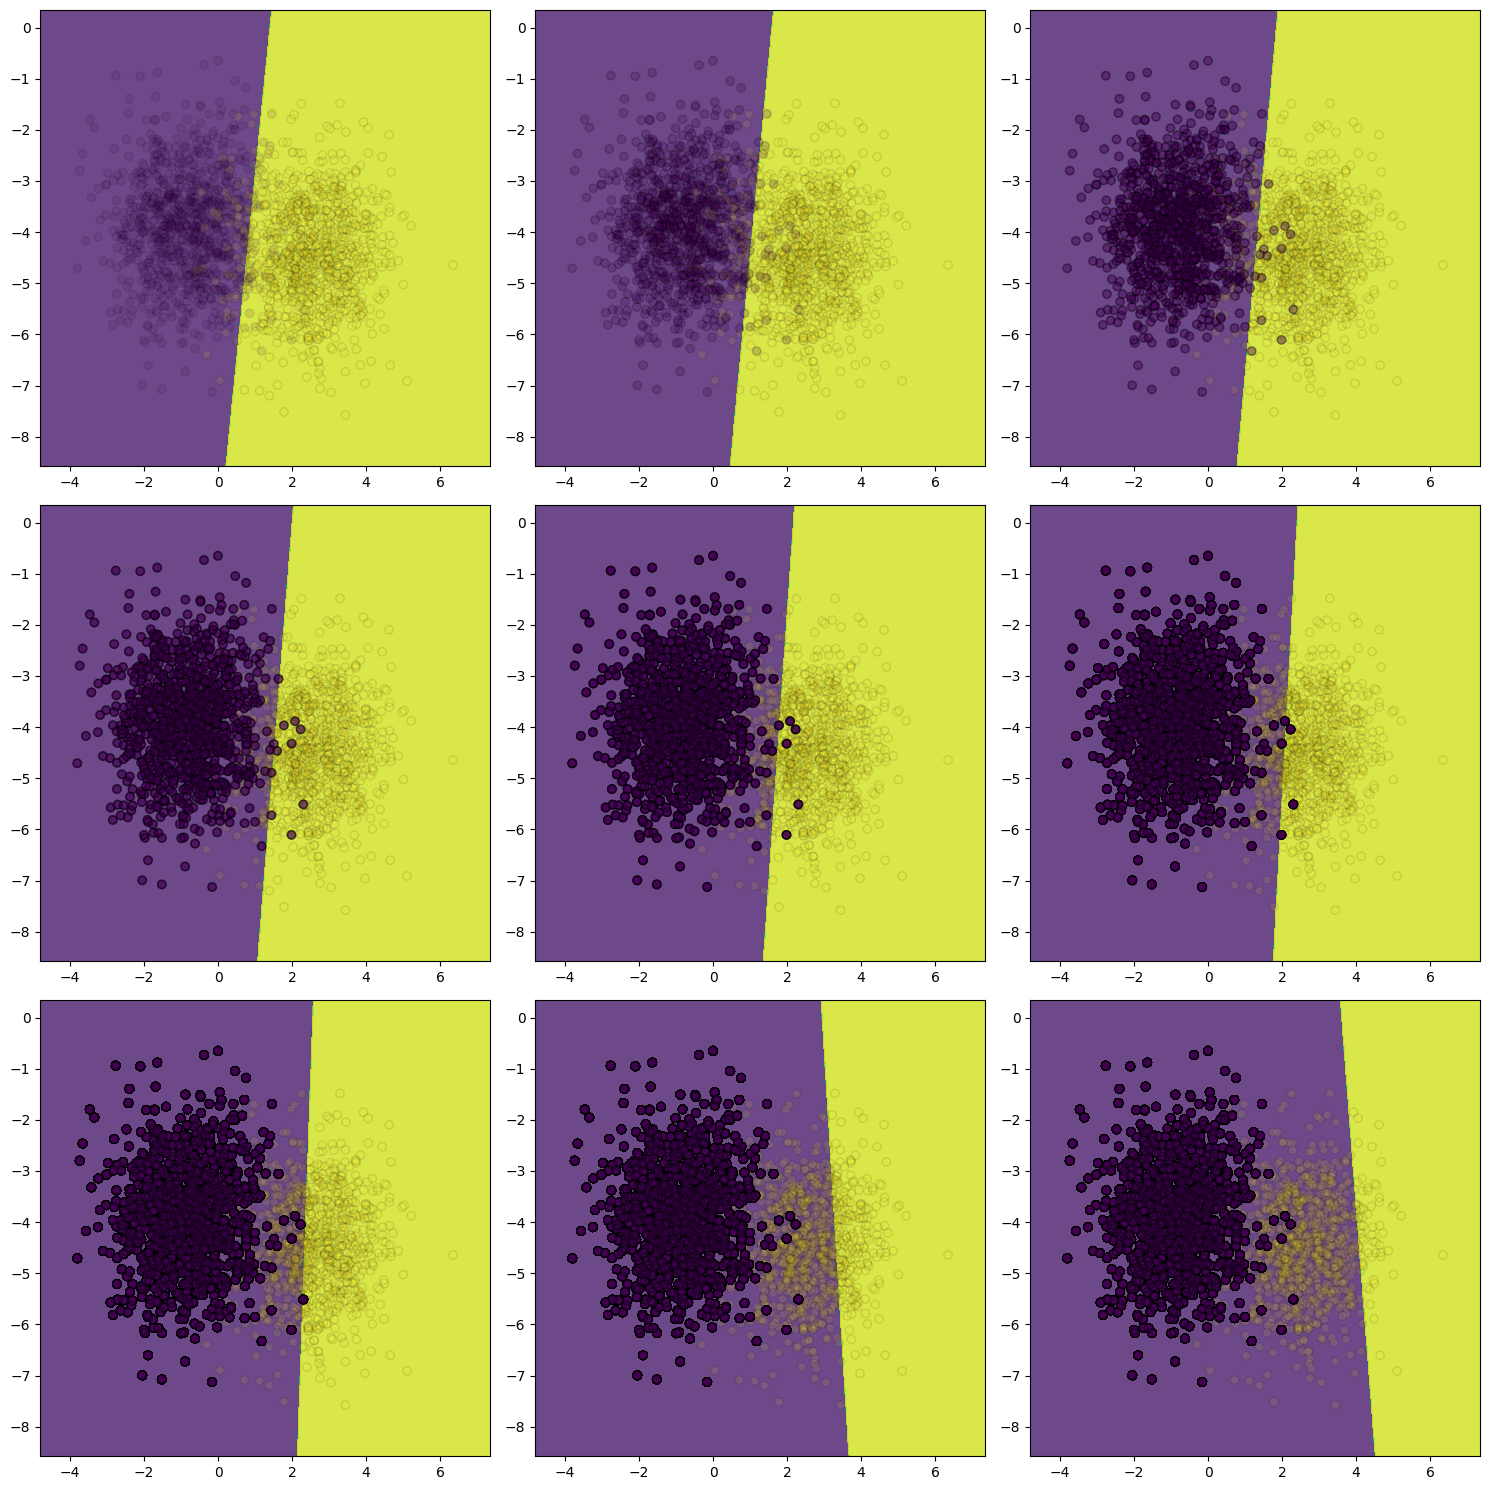

In [372]:
plt.figure(figsize=(15, 15))
plt.subplot(331)
plot_decision_boundaries(df_reduced, LinearSVC, False)
plt.subplot(332)
plot_decision_boundaries(df2_reduced, LinearSVC, False)
plt.subplot(333)
plot_decision_boundaries(df5_reduced, LinearSVC, False)
plt.subplot(334)
plot_decision_boundaries(df10_reduced, LinearSVC, False)
plt.subplot(335)
plot_decision_boundaries(df20_reduced, LinearSVC, False)
plt.subplot(336)
plot_decision_boundaries(df50_reduced, LinearSVC, False)
plt.subplot(337)
plot_decision_boundaries(df100_reduced, LinearSVC, False)
plt.subplot(338)
plot_decision_boundaries(df1000_reduced, LinearSVC, False)
plt.subplot(339)
plot_decision_boundaries(df10k_reduced, LinearSVC, False)

plt.tight_layout()
plt.show()

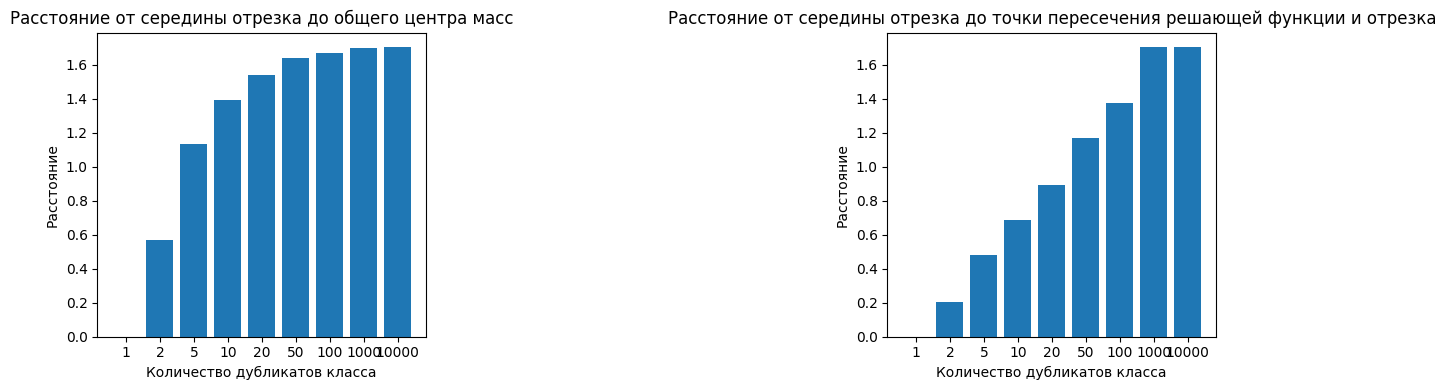

In [373]:
import math

key_points_array = key_points_df.to_dict('records')
indices = []
common_mass_centre_dist = []
intersection_point_dist = []
for kp in key_points_array:
    indices.append(str(kp['repetitions']))
    common_mass_centre_dist.append(math.dist(kp['segment_centre'], kp['common_mass_centre']))
    intersection_point_dist.append(math.dist(kp['segment_centre'], kp['intersection_point']))

plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.title('Расстояние от середины отрезка до общего центра масс')
plt.ylabel('Расстояние')
plt.xlabel('Количество дубликатов класса')
plt.bar(indices, common_mass_centre_dist)

plt.subplot(133)
plt.title('Расстояние от середины отрезка до точки пересечения решающей функции и отрезка')
plt.ylabel('Расстояние')
plt.xlabel('Количество дубликатов класса')
plt.bar(indices, intersection_point_dist)

plt.tight_layout()
plt.show()

In [462]:
def method_metrics(data_frame, target_class, model, name):
    x = data_frame[['f0', 'f1']].to_numpy()
    y = data_frame['class'].to_numpy()
    
    mode_instance = model()
    mode_instance.fit(x, y)
    
    y_prob = mode_instance.predict_proba(x)[:, target_class]
    
    fpr, tpr, thresholds = roc_curve(y, y_prob, pos_label=target_class)
    precision, recall, thresholds = precision_recall_curve(y, y_prob, pos_label=target_class)
        
    # Вычисление площади под ROC-кривой (AUC)
    roc_auc = auc(fpr, tpr)
    
    # Построение ROC-кривой
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.axis('square')
    plt.grid(True)
    
    plt.subplot(122)
    plt.plot(recall, precision, color='darkorange', lw=2,
             label=f'Precision-Recall curve (area = {average_precision_score(y, y_prob, pos_label=target_class):.2f})')
    plt.xlim((-0.02, 1.02))
    plt.ylim((-0.02, 1.02))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

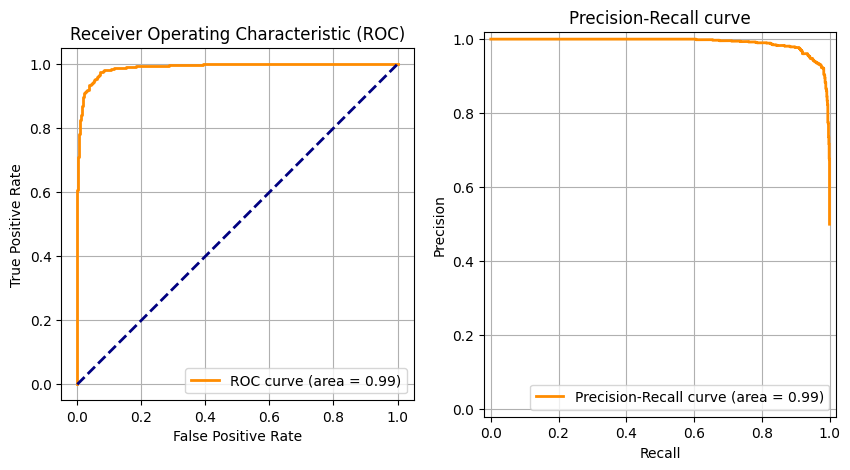

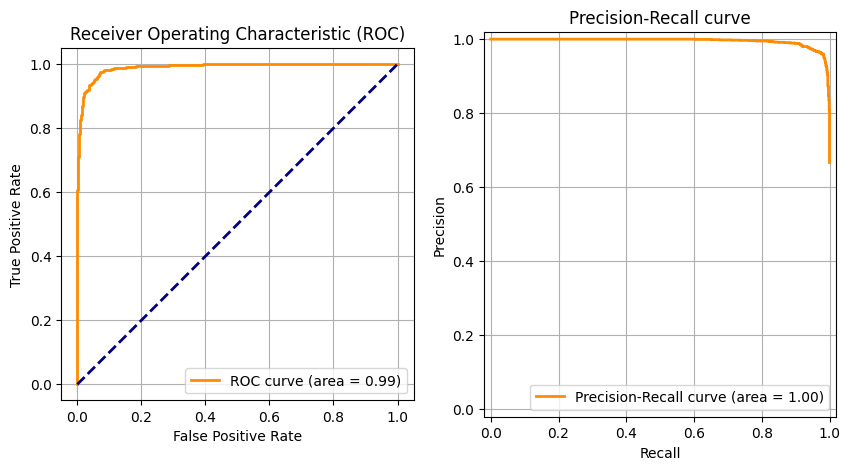

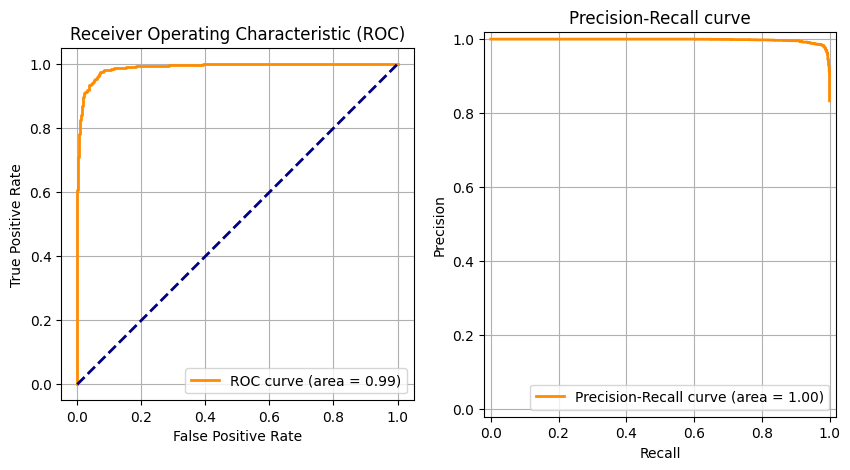

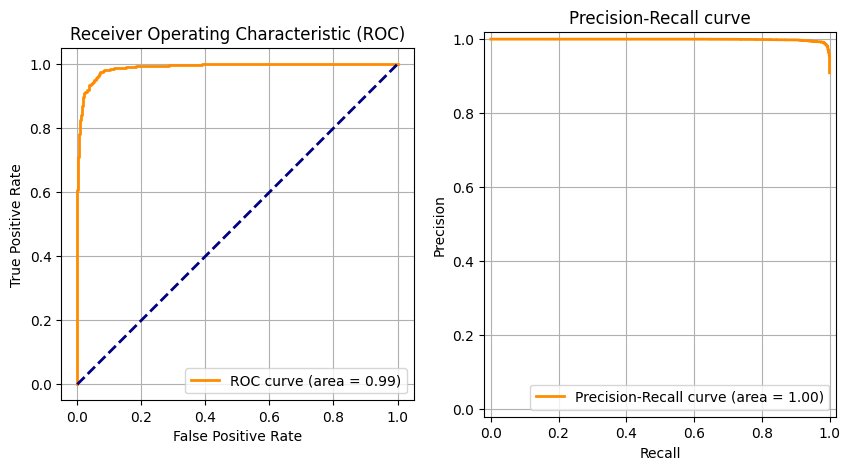

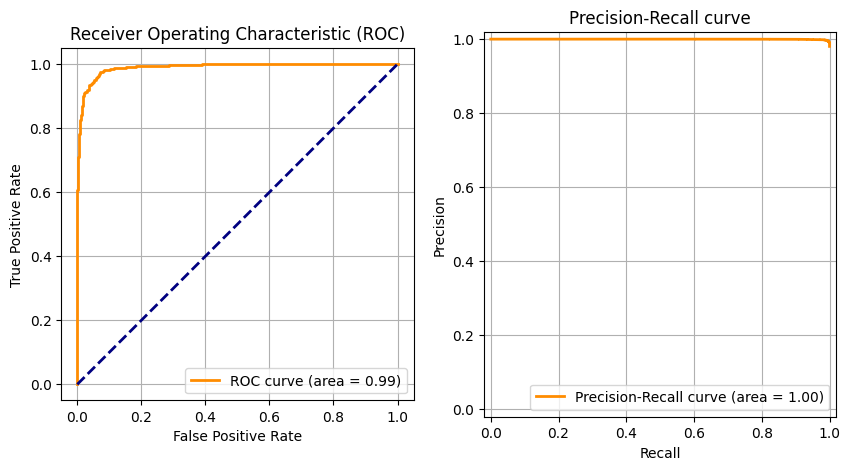

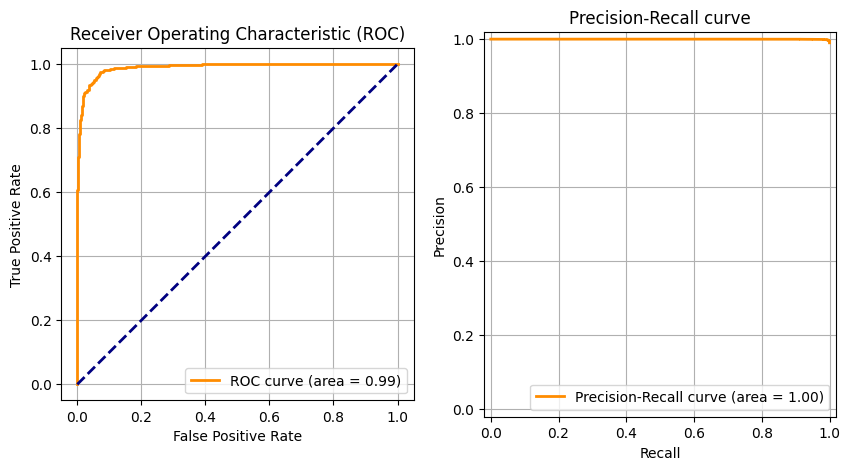

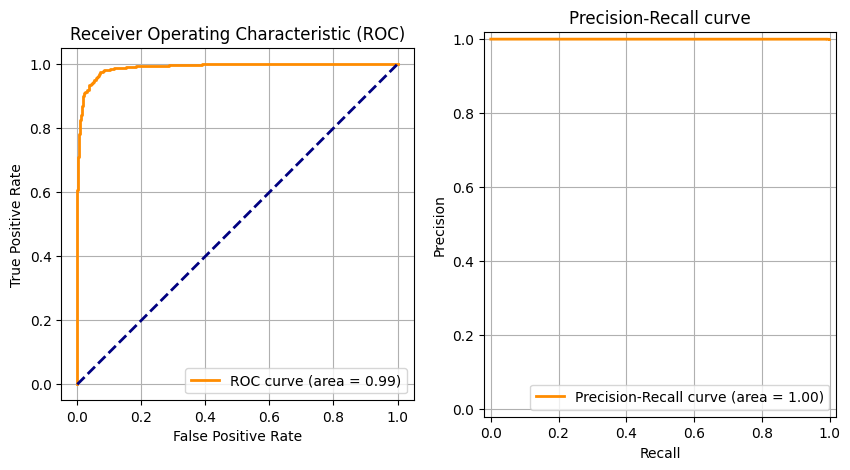

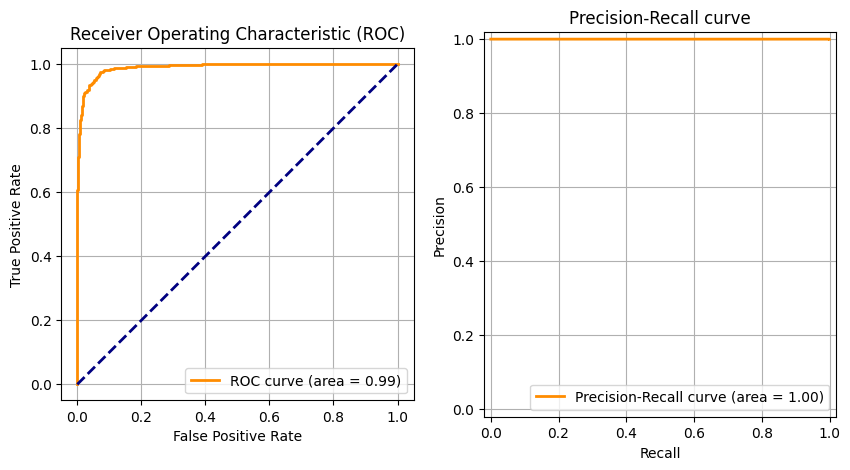

In [463]:
method_metrics(df_reduced, 0, LDA, "LDA")
method_metrics(df2_reduced, 0, LDA, "LDA")
method_metrics(df5_reduced, 0, LDA, "LDA")
method_metrics(df10_reduced, 0, LDA, "LDA")
method_metrics(df50_reduced, 0, LDA, "LDA")
method_metrics(df100_reduced, 0, LDA, "LDA")
method_metrics(df1000_reduced, 0, LDA, "LDA")
method_metrics(df10k_reduced, 0, LDA, "LDA")

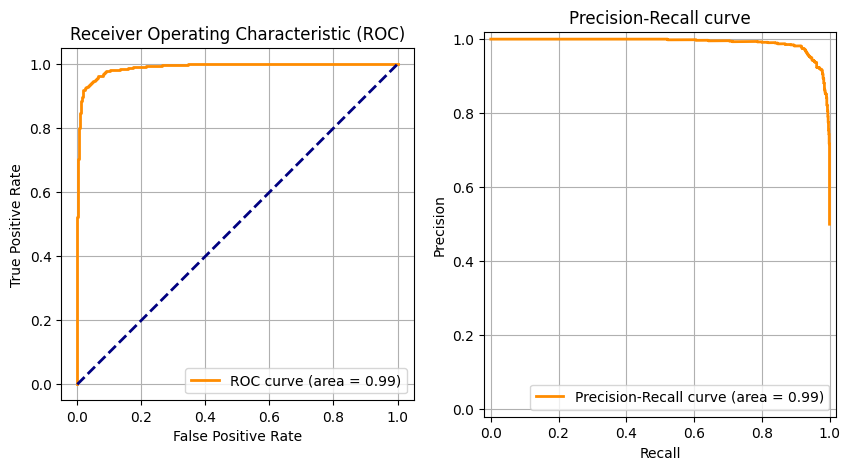

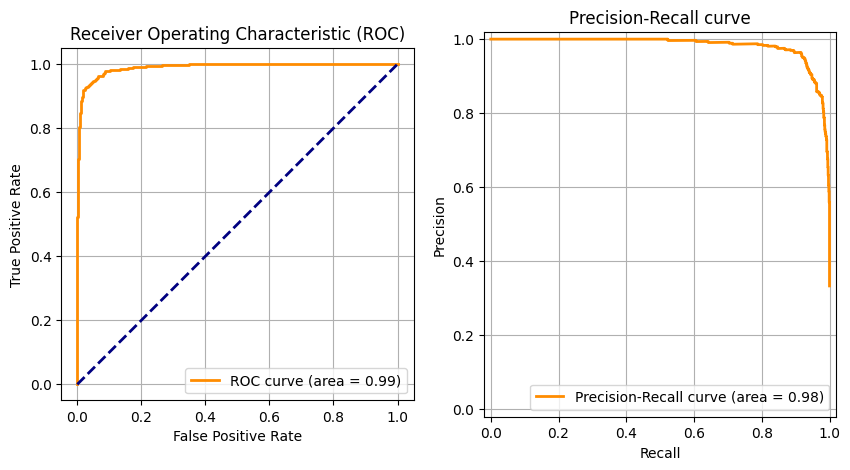

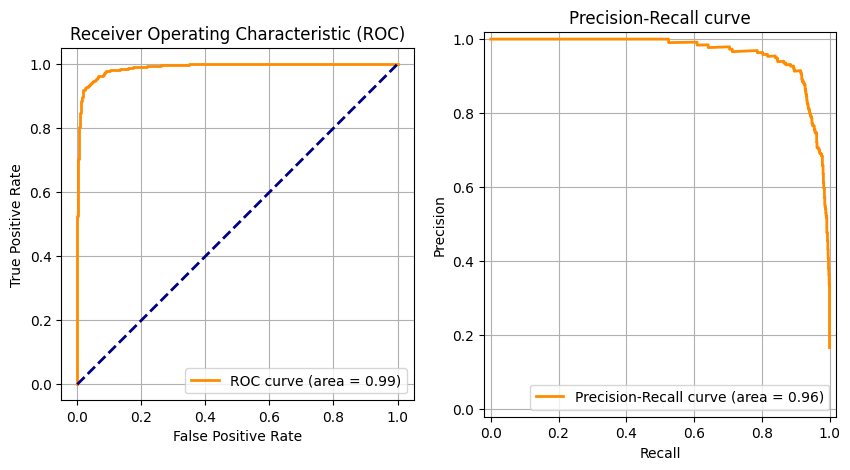

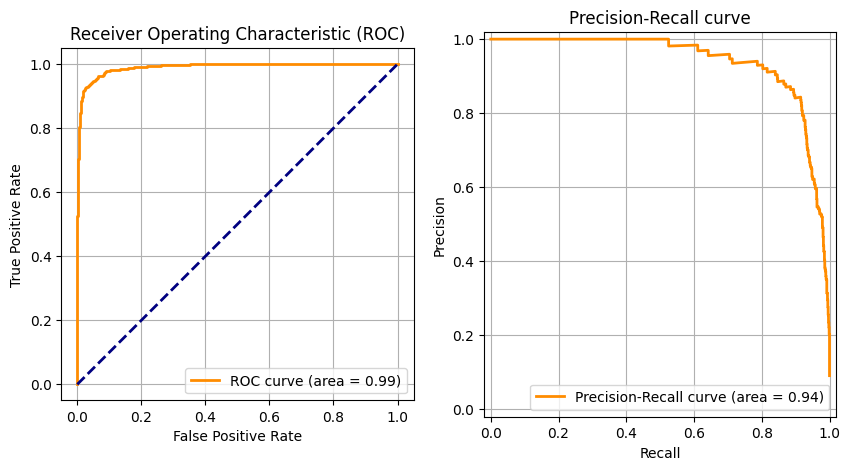

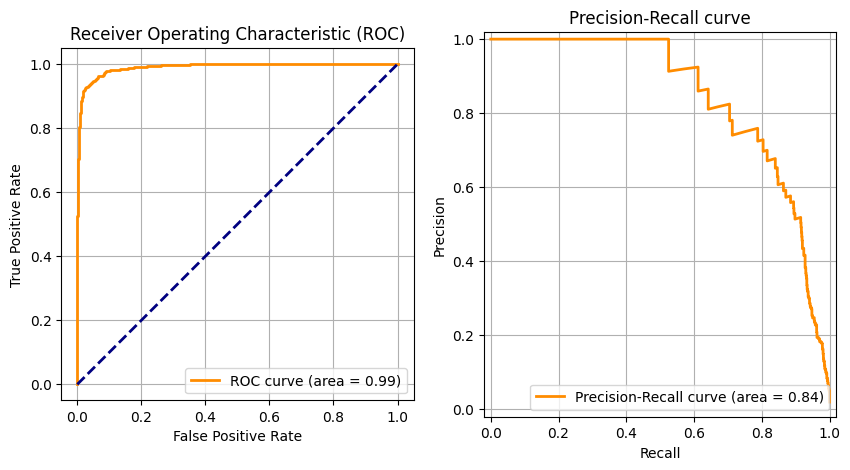

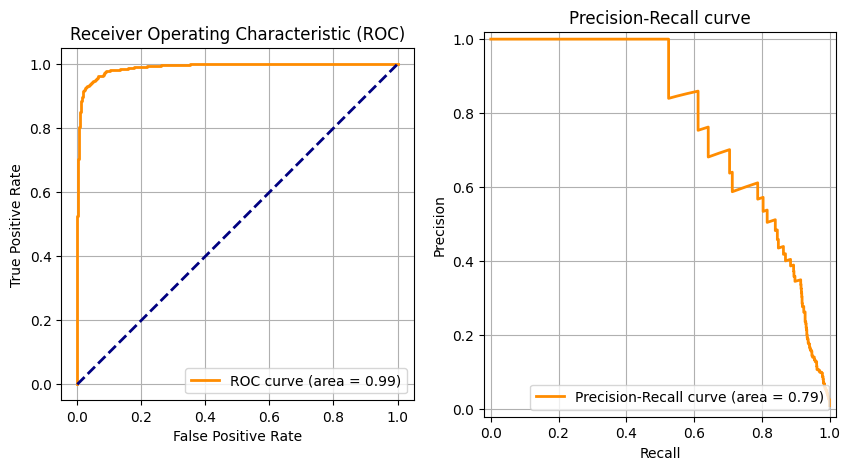

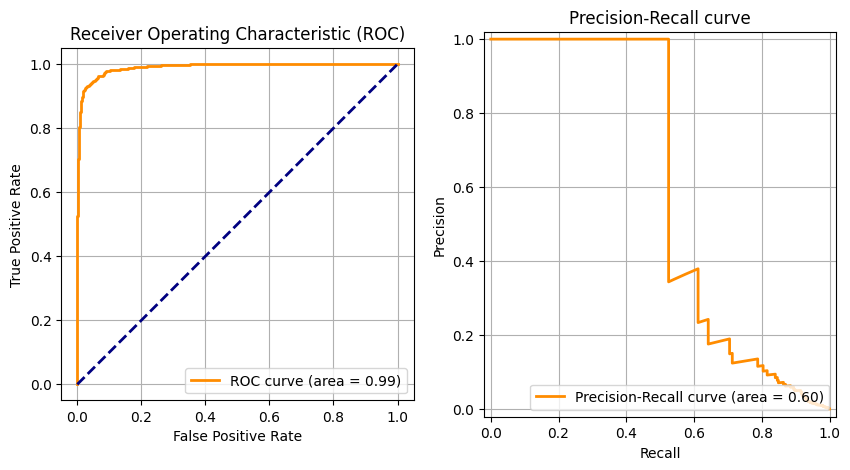

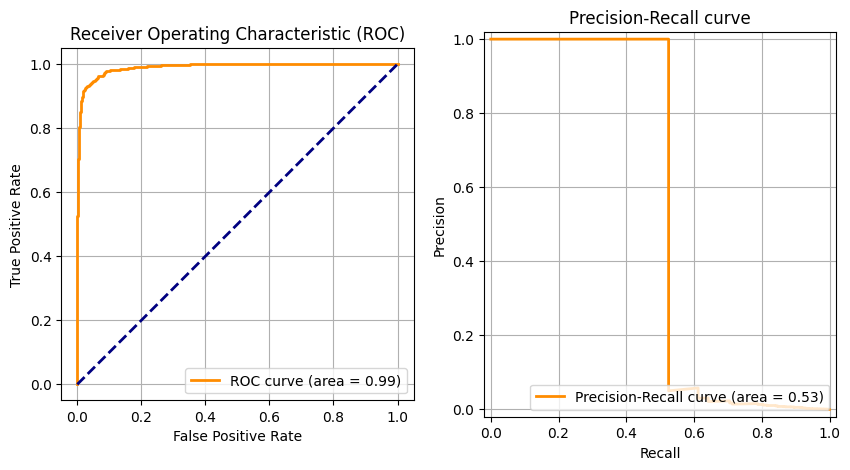

In [464]:
method_metrics(df_reduced, 1, LDA, "LDA")
method_metrics(df2_reduced, 1, LDA, "LDA")
method_metrics(df5_reduced, 1, LDA, "LDA")
method_metrics(df10_reduced, 1, LDA, "LDA")
method_metrics(df50_reduced, 1, LDA, "LDA")
method_metrics(df100_reduced, 1, LDA, "LDA")
method_metrics(df1000_reduced, 1, LDA, "LDA")
method_metrics(df10k_reduced, 1, LDA, "LDA")

In [477]:
def bootstrap_roc_auc(y_real, y_proba, n_bootstraps=1000, ci=95):
    bootstrapped_scores = []
    rng = np.random.RandomState(42)

    for i in range(n_bootstraps):
        # Бутстрепинг с повторной выборкой
        indices = rng.randint(0, len(y_proba), len(y_proba))
        if len(np.unique(y_real[indices])) < 2:
            continue  # Пропуск, если в выборке только один класс

        fpr, tpr, _ = roc_curve(y_real[indices], y_proba[indices])
        score = auc(fpr, tpr)
        bootstrapped_scores.append(score)
    
    sorted_scores = np.sort(bootstrapped_scores)
    lower_bound = np.percentile(sorted_scores, (100 - ci) / 2)
    upper_bound = np.percentile(sorted_scores, 100 - (100 - ci) / 2)
    
    return lower_bound, upper_bound

In [478]:
def bootstrap_pr_auc(y_real, y_proba, n_bootstraps=1000, ci=95):
    bootstrapped_scores = []
    rng = np.random.RandomState(42)

    for i in range(n_bootstraps):
        # Бутстрепинг с повторной выборкой
        indices = rng.randint(0, len(y_proba), len(y_proba))
        if len(np.unique(y_real[indices])) < 2:
            continue  # Пропуск, если в выборке только один класс

        precision, recall, _ = precision_recall_curve(y_real[indices], y_proba[indices])
        score = auc(recall, precision)
        bootstrapped_scores.append(score)
    
    sorted_scores = np.sort(bootstrapped_scores)
    lower_bound = np.percentile(sorted_scores, (100 - ci) / 2)
    upper_bound = np.percentile(sorted_scores, 100 - (100 - ci) / 2)
    
    return lower_bound, upper_bound

In [479]:
def show_fold(df, k):
    y_real = []
    y_proba = []
    precision_array = []
    roc_tpr_array = []
    recall_array = np.linspace(0, 1, 100)  # Массив значений Recall для PR
    roc_fpr_array = np.linspace(0, 1, 100)  # Массив значений FPR для ROC
    df_selected = df[df['class'].isin([0, 1])][['f0', 'f1'] + ['class']]
    X = df_selected[['f0', 'f1']]
    y = df_selected['class']
    skf = StratifiedKFold(n_splits=k)
    # Подготовка графиков
    fig, axes = plt.subplots(1, 2, figsize=(14, 7))  # Один график для PR, другой для ROC
    
    # Для каждого fold вычисляем PR и ROC кривые
    for i, (train_index, test_index) in enumerate(skf.split(X, y)):
        Xtrain, Xtest = X.iloc[train_index], X.iloc[test_index]
        ytrain, ytest = y.iloc[train_index], y.iloc[test_index]
        
        # Обучаем модель
        predictor = LDA()
        predictor.fit(Xtrain, ytrain)
        pred_proba = predictor.predict_proba(Xtest)
        
        # Вычисляем Precision-Recall для каждого fold
        precision_fold, recall_fold, _ = precision_recall_curve(ytest, pred_proba[:, 1])
        precision_fold, recall_fold = precision_fold[::-1], recall_fold[::-1]  # reverse order of results
        
        # Интерполяция Precision по общему массиву Recall
        prec_array = np.interp(recall_array, recall_fold, precision_fold)
        pr_auc = auc(recall_array, prec_array)
        precision_array.append(prec_array)
    
        lab_fold_pr = 'Fold %d AUPR=%.4f' % (i+1, pr_auc)
        axes[0].plot(recall_fold, precision_fold, alpha=0.3) # , label=lab_fold_pr
    
        # ROC-кривая для каждого fold
        fpr_fold, tpr_fold, _ = roc_curve(ytest, pred_proba[:, 1])
        roc_auc = auc(fpr_fold, tpr_fold)
        roc_tpr_interp = np.interp(roc_fpr_array, fpr_fold, tpr_fold)
        roc_tpr_array.append(roc_tpr_interp)
    
        lab_fold_roc = 'Fold %d AUROC=%.4f' % (i+1, roc_auc)
        axes[1].plot(fpr_fold, tpr_fold, alpha=0.3) # , label=lab_fold_roc
     
        # Собираем все реальные значения и предсказанные вероятности для бутстреппинга
        y_real.append(ytest)
        y_proba.append(pred_proba[:, 1])
    
    # Объединяем реальные значения и вероятности для общего расчета
    y_real = np.concatenate(y_real)
    y_proba = np.concatenate(y_proba)
    
    # Общая PR-кривая
    precision, recall, _ = precision_recall_curve(y_real, y_proba)
    lab_pr = 'Overall AUPR=%.4f' % (auc(recall, precision))
    axes[0].plot(recall, precision, lw=2, color='red', label=lab_pr)
    
    # Общая ROC-кривая
    fpr, tpr, _ = roc_curve(y_real, y_proba)
    lab_roc = 'Overall AUROC=%.4f' % (auc(fpr, tpr))
    axes[1].plot(fpr, tpr, lw=2, color='red', label=lab_roc)
    
    # Расчет доверительного интервала CI95 для общей PR-кривой
    lower_ci_pr, upper_ci_pr = bootstrap_pr_auc(y_real, y_proba, n_bootstraps=1000, ci=95)
    mean_precision = np.mean(precision_array, axis=0)
    std_precision = np.std(precision_array, axis=0)
    
    # Вычисляем нижнюю и верхнюю границы доверительного интервала для PR
    ci_lower_pr, ci_upper_pr = mean_precision - std_precision, mean_precision + std_precision
    axes[0].fill_between(recall_array, ci_lower_pr, ci_upper_pr, alpha=0.2, color='grey', label=f'95% CI [{lower_ci_pr:.4f}, {upper_ci_pr:.4f}]')
    
    # Расчет доверительного интервала CI95 для общей ROC-кривой
    lower_ci_roc, upper_ci_roc = bootstrap_roc_auc(y_real, y_proba, n_bootstraps=1000, ci=95)
    mean_tpr = np.mean(roc_tpr_array, axis=0)
    std_tpr = np.std(roc_tpr_array, axis=0)
    
    # Вычисляем нижнюю и верхнюю границы доверительного интервала для ROC
    ci_lower_roc, ci_upper_roc = mean_tpr - std_tpr, mean_tpr + std_tpr
    axes[1].fill_between(roc_fpr_array, ci_lower_roc, ci_upper_roc, alpha=0.2, color='grey', label=f'95% CI [{lower_ci_roc:.4f}, {upper_ci_roc:.4f}]')
    
    # Настройка графиков
    axes[0].legend(loc='lower left', fontsize='small')
    axes[0].set_title("PR curves with CI95; {} folds".format(skf.n_splits), weight="bold", fontsize=15)
    axes[0].set_xlabel("Recall (Sensitivity)", fontsize=12)
    axes[0].set_ylabel("Precision (PPV)", fontsize=12)
    
    axes[1].legend(loc='lower right', fontsize='small')
    axes[1].set_title("ROC curves with CI95; {} folds".format(skf.n_splits), weight="bold", fontsize=15)
    axes[1].set_xlabel("False Positive Rate", fontsize=12)
    axes[1].set_ylabel("True Positive Rate", fontsize=12)
    
    plt.tight_layout()
    plt.show()

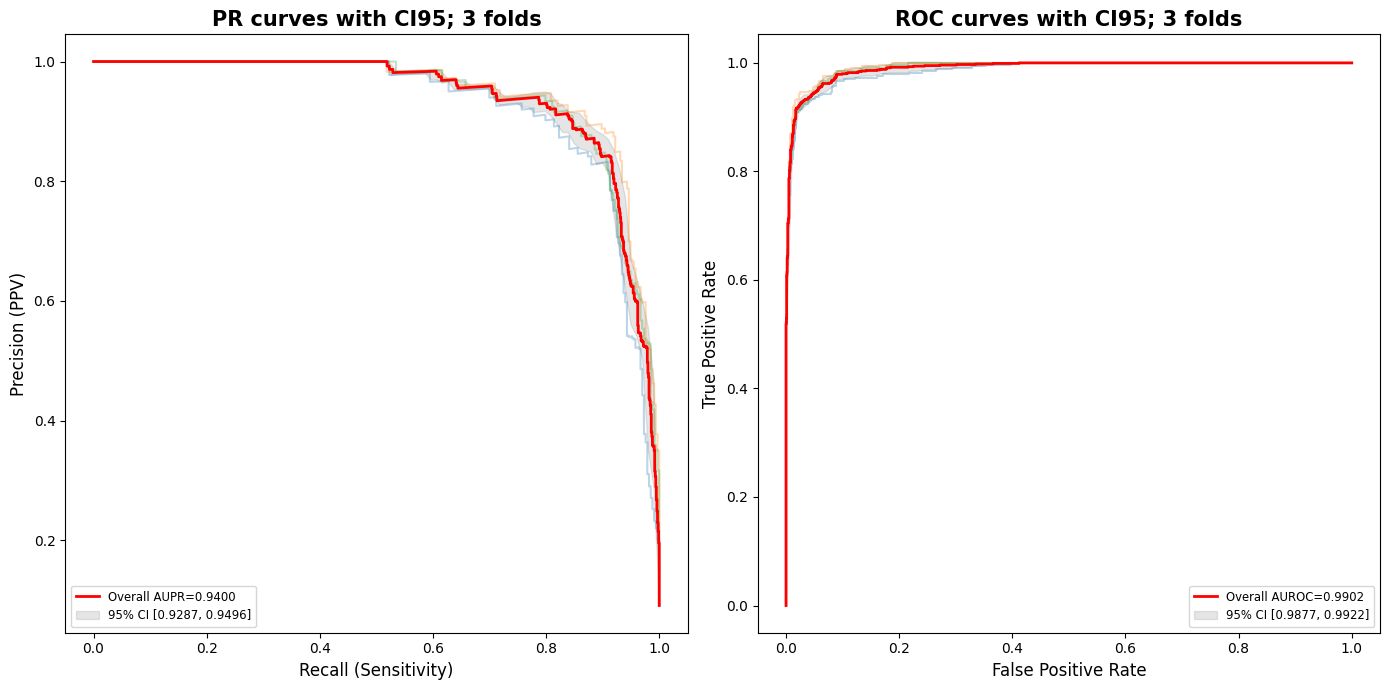

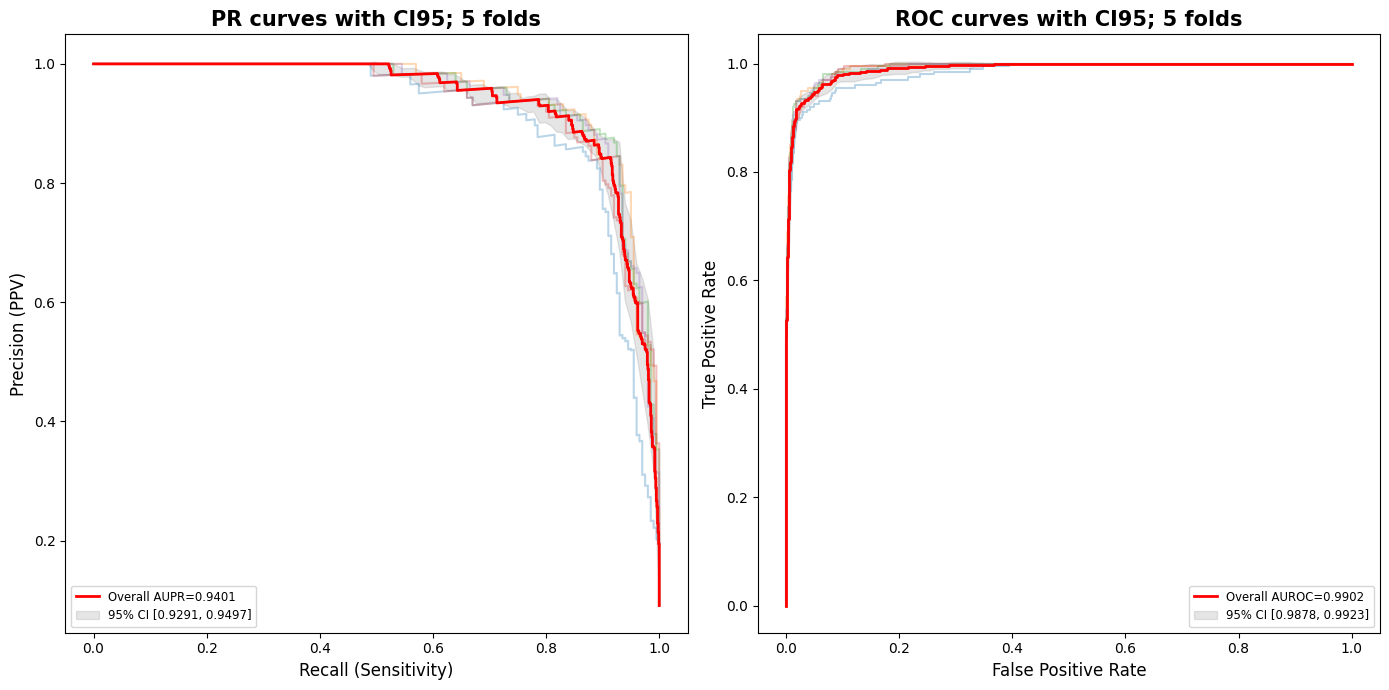

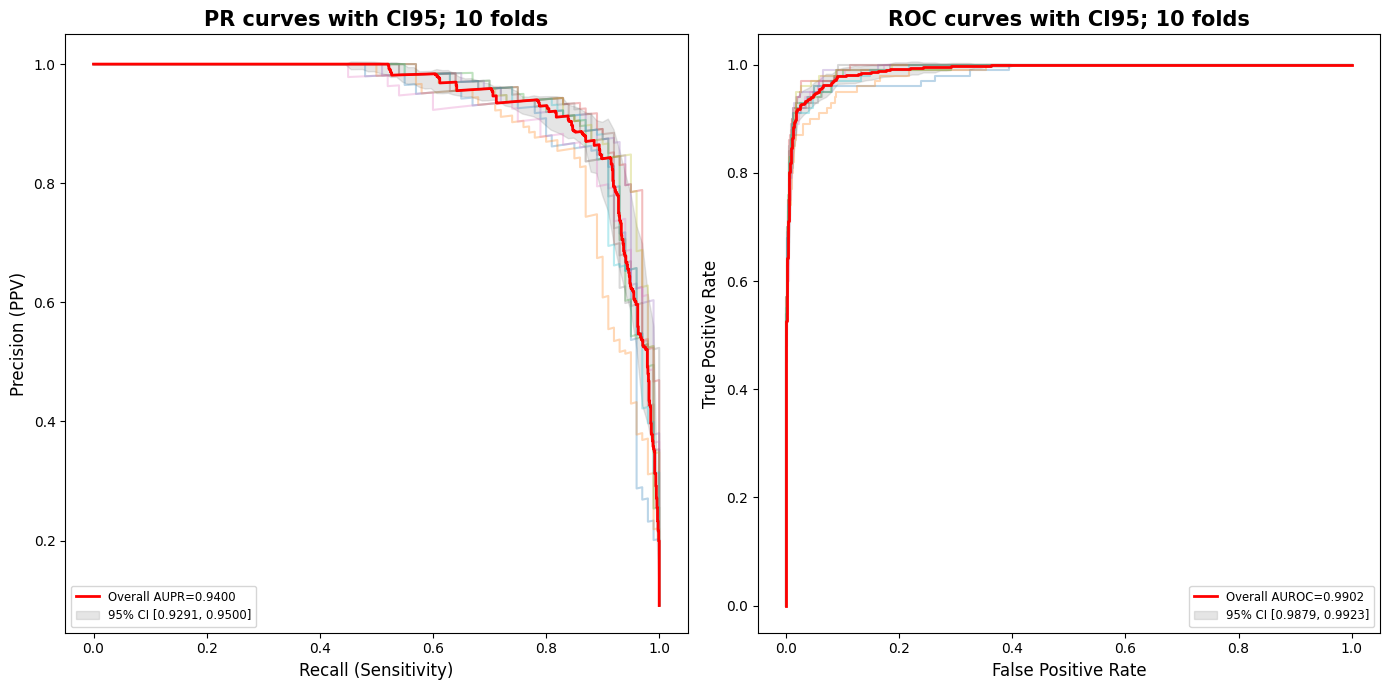

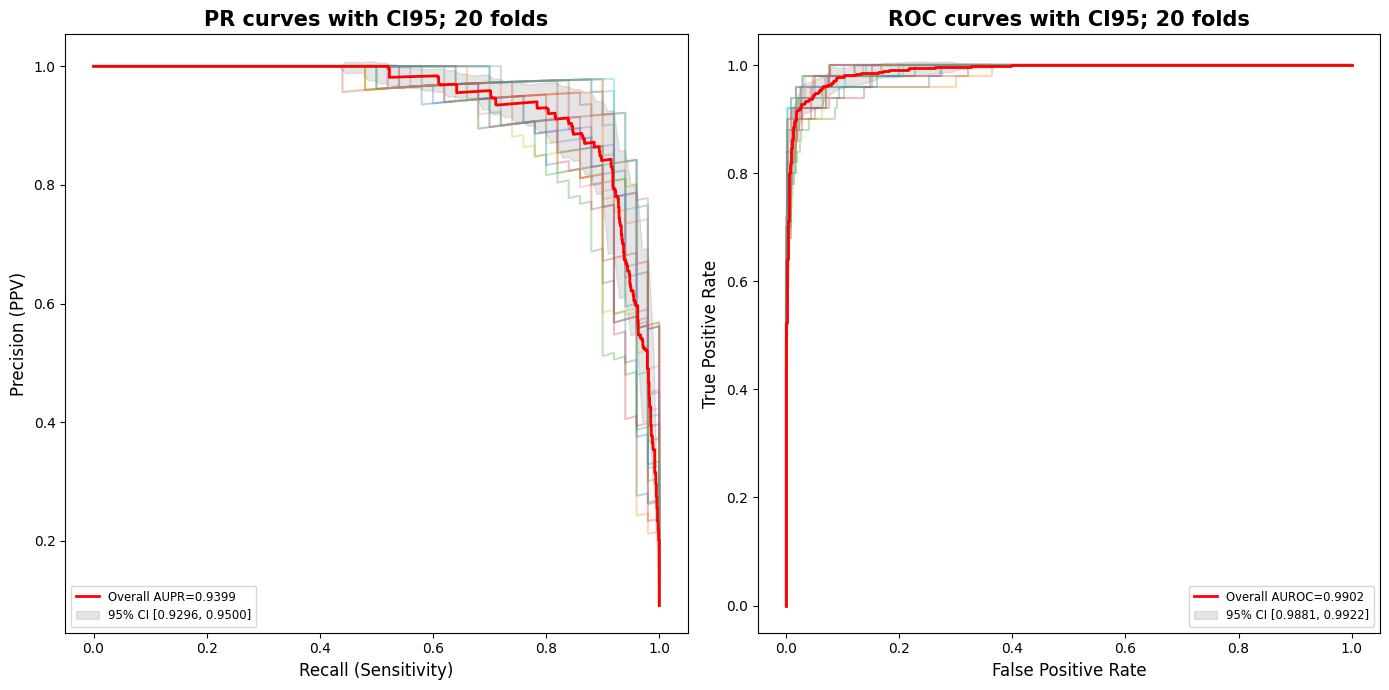

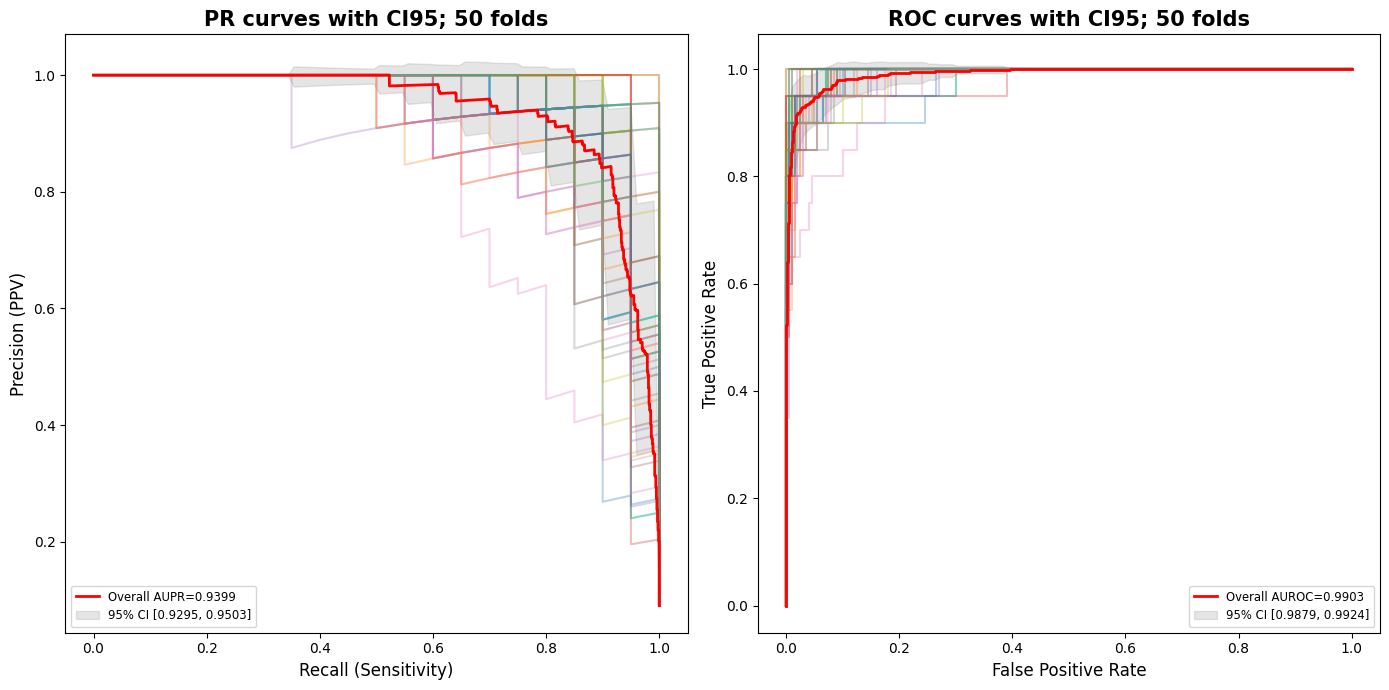

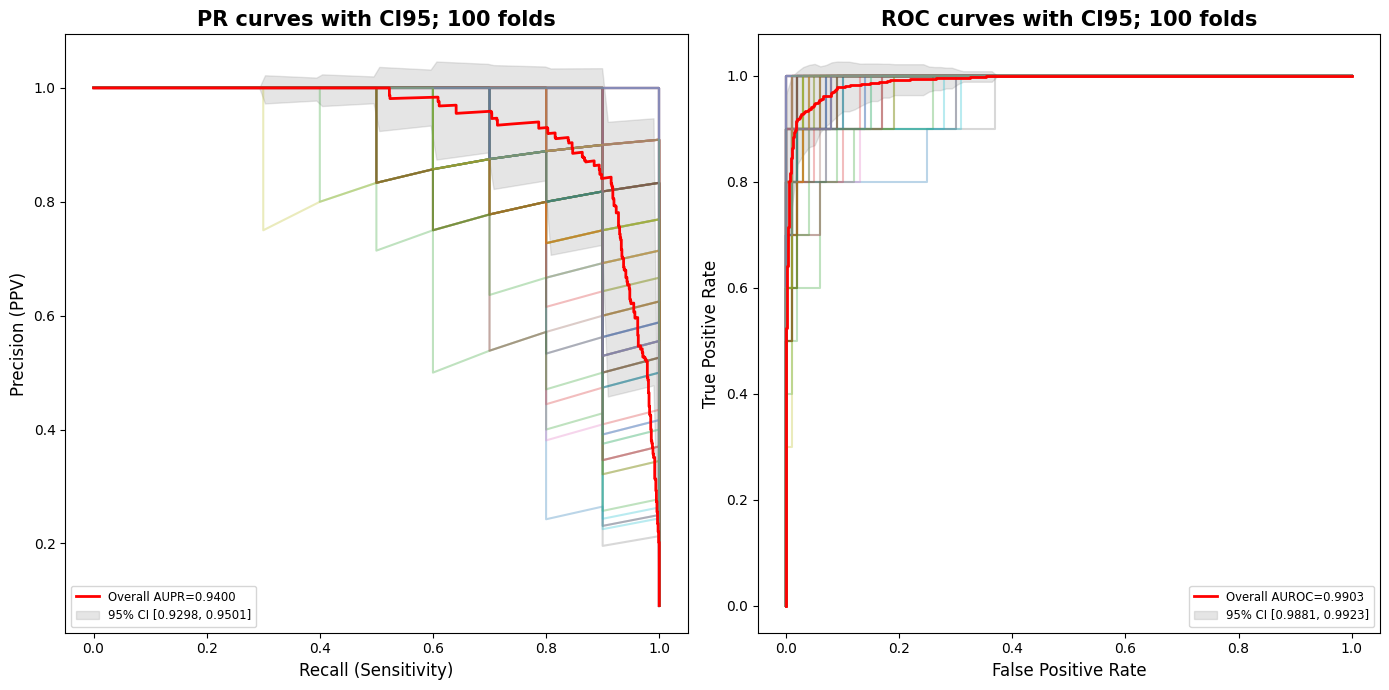

In [480]:
folds = [3, 5, 10, 20, 50, 100]
for k in folds:
    show_fold(df10_reduced, k)